> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：调查FBI枪支数据的变化以及和人口数据的关联

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 在这个项目中，我们主要研究了两个部分的问题，一个是枪支总数量随时间的变化情况，另一个是枪支的持有情况和人口中的哪些内容有所关联，哪些内容没有关系

## 研究的问题
>在这个项目中，我首先以阿拉斯加州为例子，研究了近二十年来枪支总数的变化情况，然后研究了全美国五十个州，黑人比例，房屋租赁比例，州土地面积对枪支持有总数的影响，并运用可视化界面形象的展示了出来

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> 我将数据整理分为了两个部分，首先对枪支数据文件进行了导入，并读取了前五行，同时检查了每一列元素的类型，其次在第二部分中，我用相同的方法观察了人口普查数据
### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df_guns=pd.DataFrame(pd.read_excel('gun_data.xlsx'))
df_guns.info()
df_guns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
#读取人口文件，观察其数据类型以及前五行
df_cenus=pd.DataFrame(pd.read_csv('U.S. Census Data.csv',header=0))
df_cenus.info()
df_cenus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理
>对枪支数据的清理
>通过统计，我们发现所有缺失值的地方，其余所有值加起来的和等于最后的总数值，因此得出结论，用零来填充缺失值

>展示有缺失值的行，并发现缺失值的地方，其他剩余值加起来恰好等于枪支总数

In [4]:
df_guns2=df_guns.T[2:-1]
row1,column1=np.shape(df_guns2)
totals=df_guns['totals']#获取最后一行的枪支总数值
totals=totals.astype('float')
shuld_fill_zero_number=0
shuld_not_fill_zero_number=0
columns=list(df_guns2.columns)
df_guns2.head()
df_guns2=df_guns2.fillna(0)#假设将缺失值都填充为0，发现剩余有效值的综合就是枪支总数总和，因此补充为零正确
for column in columns:
    if sum(df_guns2[column])==totals[column]:
        shuld_fill_zero_number+=1
    else:
        shuld_not_fill_zero_number+=1
print(shuld_fill_zero_number)
print(shuld_not_fill_zero_number)

12485
0


In [5]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
#运用类型转换将错误的类型进行转换
df_guns['month'] = pd.to_datetime(df_guns['month'])
df_guns['multiple']=df_guns['multiple'].astype('float')
df_guns['totals']=df_guns['totals'].astype('float')
#因为通过统计发现，在去掉缺少值的情况下，剩下的值加起来都等于每一行的总数值，因此用0来填充空缺值
df_guns=df_guns.fillna(value=0)
#观察清理后的数据类型以及前五行
#观察是否有重复值
sum(df_guns.duplicated())
df_guns.info()
df_guns.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null float64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
r

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019.0
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303.0
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394.0
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747.0
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0


#### 对人口数据的清理
通过观察最后十行发现最后十行是注释

In [6]:
#观察后十行，发现是文件的注释，因此，将其去掉防止影响分析
print(df_cenus.tail(10))
#去掉文件中的注释部分，防止其影响分析
df_cenus=df_cenus.drop([64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84])

           Fact                                          Fact Note Alabama  \
75          NaN                                                NaN     NaN   
76  Value Flags                                                NaN     NaN   
77            -  Either no or too few sample observations were ...     NaN   
78            D  Suppressed to avoid disclosure of confidential...     NaN   
79            F                                Fewer than 25 firms     NaN   
80           FN             Footnote on this item in place of data     NaN   
81          NaN                                      Not available     NaN   
82            S    Suppressed; does not meet publication standards     NaN   
83            X                                     Not applicable     NaN   
84            Z  Value greater than zero but less than half uni...     NaN   

   Alaska Arizona Arkansas California Colorado Connecticut Delaware   ...    \
75    NaN     NaN      NaN        NaN      NaN         NaN    

### 关于下方代码框的解释
>下面代码框进行的操作时，首先将数据中object对象中包含的%等会影响字符串转换为float类型的字符去掉，并对所有字符串进行类型转换，转换为float型

In [7]:
#将Fact,Factnote设置为索引行，并提取Fact中的内容
rows=np.array(df_cenus['Fact'])
df_cenus.set_index(['Fact','Fact Note'], inplace = True)
#利用切片操作循环访问数据表中的每一个值
columns=list(df_cenus.columns)
new_columns=set()
for column in columns:
    for row in rows:
        if '%' in str(df_cenus.loc[[row],[column]][column]):
            new_columns.add(column)
    df_cenus[column]=df_cenus[column].str.replace(',','')
    df_cenus[column]=df_cenus[column].str.replace('$','')
    df_cenus[column]=df_cenus[column].str.replace('D','np.nan')
    df_cenus[column]=df_cenus[column].str.replace('Z','0')
    df_cenus[column]=df_cenus[column].str.replace('FN','0')
    df_cenus[column]=df_cenus[column].str.replace('%','0') 
df_cenus = df_cenus.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### 将百分数中大小不正确的数据进行修改
>在之前的观察中，我们发现，在比例有关的行中，有的是以百分号形式显示的，有的是以小数形式显示的，两者之间有一百倍的相差关系，因此，下面的代码框的目的是将两者统一
>而统一的方法则使用的是在上个代码框中标记出现%的位置，在下面的代码框中，对这些位置上的数据除以100

In [8]:
#统一百分数
for row in rows:
    if "percent" in row:
        for new_column in new_columns:
            df_cenus.loc[[row],[new_column]]=df_cenus.loc[[row],[new_column]]/100   
#选取一列进行检验
df_cenus.loc['Persons under 5 years, percent, July 1, 2016,  (V2016)']
#将空缺值用该行平均值代替
means=df_cenus.ix['Total manufacturers shipments, 2012 ($1,000)'].mean(1)
df_cenus=df_cenus.fillna(means[0])
#观察数据,并检测是否有重复行
sum(df_cenus.duplicated())
df_cenus.info()
df_cenus.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 64 entries, (Population estimates, July 1, 2016,  (V2016), nan) to (Land area in square miles, 2010, nan)
Data columns (total 50 columns):
Alabama           64 non-null float64
Alaska            64 non-null float64
Arizona           64 non-null float64
Arkansas          64 non-null float64
California        64 non-null float64
Colorado          64 non-null float64
Connecticut       64 non-null float64
Delaware          64 non-null float64
Florida           64 non-null float64
Georgia           64 non-null float64
Hawaii            64 non-null float64
Idaho             64 non-null float64
Illinois          64 non-null float64
Indiana           64 non-null float64
Iowa              64 non-null float64
Kansas            64 non-null float64
Kentucky          64 non-null float64
Louisiana         64 non-null float64
Maine             64 non-null float64
Maryland          64 non-null float64
Massachusetts     64 non-null float64
Michigan     

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,Fact Note,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",NaN,4863300.000,741894.000,6931071.000,2988248.000,3.925002e+07,5540545.000,3576452.000,952065.000,2.061244e+07,1.031037e+07,...,865454.000,6651194.000,2.786260e+07,3051217.000,624594.000,8411808.000,7288000.000,1831102.000,5778708.000,585501.000
"Population estimates base, April 1, 2010, (V2016)",NaN,4780131.000,710249.000,6392301.000,2916025.000,3.725452e+07,5029324.000,3574114.000,897936.000,1.880459e+07,9.688680e+06,...,814195.000,6346298.000,2.514610e+07,2763888.000,625741.000,8001041.000,6724545.000,1853011.000,5687289.000,563767.000
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",NaN,0.017,0.045,0.084,0.025,5.400000e-02,0.102,0.001,0.060,9.600000e-02,6.400000e-02,...,0.063,0.048,1.080000e-01,0.104,-0.002,0.051,0.084,-0.012,0.016,0.039
"Population, Census, April 1, 2010",NaN,4779736.000,710231.000,6392017.000,2915918.000,3.725396e+07,5029196.000,3574097.000,897934.000,1.880131e+07,9.687653e+06,...,814180.000,6346105.000,2.514556e+07,2763885.000,625741.000,8001024.000,6724540.000,1852994.000,5686986.000,563626.000
"Persons under 5 years, percent, July 1, 2016, (V2016)",NaN,0.060,0.073,0.063,0.064,6.300000e-02,0.061,0.052,0.058,5.500000e-02,6.400000e-02,...,0.071,0.061,7.200000e-02,0.083,0.049,0.061,0.062,0.055,0.058,0.065


<a id='eda'></a>
# 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

## 问题1:探究近几十年来枪支持有总数的整体变化趋势（以阿拉斯加州为例）

Text(0,0.5,'guns number')

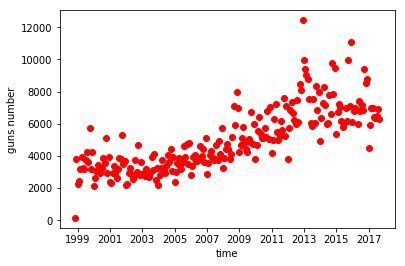

In [9]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
df_alaska=df_guns.query('state==["Alaska"]')
plt.plot(df_alaska['month'], df_alaska['totals'],'ro', label='broadcast')
plt.xlabel('time')
plt.ylabel('guns number')

### 对图形的分析
>通过观察阿拉斯加二十年来的枪支持有总数的散点图，可以得出结论，枪支数量在近二十年来一直处在一个上升的趋势下，同时，也有着增长率持续走高的倾向

## 问题2:研究全美国五十个州2016年人均枪支持有率与哪些人口因素存在关联

In [10]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
#创建一个全新的表格包含我们要研究的数据
#提取2016年各州枪支总数并导入各个需要数据并为黑人比例超过百分之十五的州进行标记
df_2016_guns=df_guns[(df_guns['month']>=pd.to_datetime('20110101')) & (df_guns['month']<=pd.to_datetime('20151201'))]
df_2016_guns.set_index(['state'],inplace=True)
df_question2=df_cenus.T['Population estimates, July 1, 2016,  (V2016)']
df_question2.columns=['Population estimates, July 1, 2016,  (V2016)']
guns_number=np.array([])
df_question2['guns_number']=1
df_question2['blackman_up_10%_percent']=0
df_question2['housing_units']=df_cenus.T['Housing units,  July 1, 2016,  (V2016)']
df_question2['black']=df_cenus.T['Black or African American alone, percent, July 1, 2016,  (V2016)']
df_question2['white']=df_cenus.T['White alone, percent, July 1, 2016,  (V2016)']
df_question2['land']=df_cenus.T['Land area in square miles, 2010']
df_question2['guns_number for everyone']=df_question2['Population estimates, July 1, 2016,  (V2016)']/df_question2['land']
df_question2['age under 18 percent']=df_cenus.T['Persons under 18 years, percent, July 1, 2016,  (V2016)']
for column1 in columns:
    if float(df_cenus.loc[['Black or African American alone, percent, July 1, 2016,  (V2016)'],[column1]][column1])>0.1:
        df_question2.loc[[column1],['blackman_up_10%_percent']]=1
    df_temporary=df_2016_guns.loc[column1]
    df_question2.loc[[column1],['guns_number']]=sum(df_temporary['totals'])
df_question2['guns_number for everyone']=df_question2['guns_number']/df_question2['Population estimates, July 1, 2016,  (V2016)']   
#删除值明显异常的kentucky州
df_question2=df_question2.drop(['Kentucky'])
df_question2=df_question2.sort_values(by=['guns_number for everyone'])
#通过相关性分析函数分析他们的线形相关程度，从而对所有数据的大致变化倾向有一个大体了解
df_question2.corr()


,"Population estimates, July 1, 2016, (V2016)",guns_number,blackman_up_10%_percent,housing_units,black,white,land,guns_number for everyone,age under 18 percent
"Population estimates, July 1, 2016, (V2016)",1.000000,0.848297,0.344200,0.993914,0.206892,-0.168388,0.136634,-0.345349,0.029085
guns_number,0.848297,1.000000,0.386647,0.859402,0.209282,-0.056223,0.147715,0.002829,0.152442
blackman_up_10%_percent,0.344200,0.386647,1.000000,0.393781,0.819437,-0.426585,-0.209215,-0.225623,-0.077775
housing_units,0.993914,0.859402,0.393781,1.000000,0.237514,-0.166395,0.110831,-0.349905,-0.002963
black,0.206892,0.209282,0.819437,0.237514,1.000000,-0.581016,-0.228415,-0.251954,-0.000859
white,-0.168388,-0.056223,-0.426585,-0.166395,-0.581016,1.000000,-0.019802,0.420525,-0.027997
land,0.136634,0.147715,-0.209215,0.110831,-0.228415,-0.019802,1.000000,0.290558,0.425199
guns_number for everyone,-0.345349,0.002829,-0.225623,-0.349905,-0.251954,0.420525,0.290558,1.000000,0.359031
age under 18 percent,0.029085,0.152442,-0.077775,-0.002963,-0.000859,-0.027997,0.425199,0.359031,1.000000


>通过上表的线性相关性分析，我们选取研究黑人比例对枪支总数的影响，房屋租赁比率对枪支总数的影响以及人口数量对枪支比例的影响

### (a)对比黑人较多和较少的州中黑人比例对枪支总数的影响
>将黑人较多的州和较少的州整合起来来看，枪支持有总数随黑人比例为正态分布，峰值在0.13左右，其中白人较多的州，随着黑人比例的增加枪支数量会有所上升，但是黑人较多的州则会随着黑人比例的增加，枪支总数有所下降

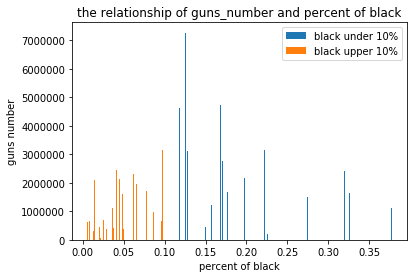

In [11]:
#将黑人比例超过百分之十的州单独分析，将其分成两个新的数据表
df_question21=df_question2[df_question2['blackman_up_10%_percent']==1]
df_question22=df_question2[df_question2['blackman_up_10%_percent']==0]
#黄色部分为黑人较少的州，蓝色部分是黑人较多的州
plt.bar(df_question21['black'],df_question21['guns_number'],width=0.001,label='black under 10%')
plt.bar(df_question22['black'],df_question22['guns_number'],width=0.001,label='black upper 10%')
plt.xlabel('percent of black')
plt.ylabel('guns number')
plt.title('the relationship of guns_number and percent of black')
plt.legend(loc='upper right')

### 对图形的分析
>观察可视化界面我们可以发现，在黑人比例低于大约百分之十三的时候，随着黑人比例的上升，枪支持有总数也呈现上升趋势，并在大雨百分之十三的地方达到峰值，之后随着黑人比例的增加，柱状图的柱高持续走低

### （b)探究房屋租赁比例和人口总数对枪支总数的影响
>通过上面的线性相关性分析以及散点图的绘制，我得出结论，在目前已知的数据情况下，枪支总数和房屋租赁数量呈正相关关系，和人口总数也呈正相关关系

Text(0,0.5,'guns_number')

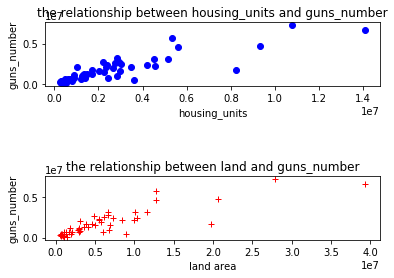

In [12]:
#蓝色为房屋租赁比例，红色为人口总数
plt.subplot(3,1,1)
plt.plot(df_question2['housing_units'],df_question2['guns_number'],'bo')
plt.title('the relationship between housing_units and guns_number')
plt.xlabel('housing_units')
plt.ylabel('guns_number')
plt.subplot(3,1,3)
plt.plot(df_question2['Population estimates, July 1, 2016,  (V2016)'],df_question2['guns_number'],'r+')
plt.title('the relationship between land and guns_number')
plt.xlabel('land area')
plt.ylabel('guns_number')

### 对图形的分析
>通过对上面两张散点图的分析，我们发现，随着土地面积和房租租赁数量的上升，枪支的持有数量也在不断的上升，但在较远的地方枪支数量趋于稳定

<a id='conclusions'></a>
## 结论

> 根据上面的数据分析，我得出结论，首先，我以阿拉斯加为例子，分析发现近二十年来，该州的枪支总数整体上在不断的上上
>其次，，将黑人较多的州和较少的州整合起来来看，枪支持有总数随黑人比例为正态分布，峰值在0.13左右，其中白人较多的州，随着黑人比例的增加枪支数量会有所上升，但是黑人较多的州则会随着黑人比例的增加，枪支总数有所下降。
>同时，根据房屋租赁比例以及人口总数和枪支总数的数据表绘制散点图，得出随着人口的增长和房屋租赁数量的增加，枪支持有总数也会有所增加，他们呈正相关关系
>最后，我的所有分析都是建立在有限的数据上的，同时对于枪支的数量的影响因素也是多种多样的，我的分析只考虑了部分影响因素，因此存在一定的局限性，仅仅只在其他因素不变的情况下有效，同时关于时间问题的分析，我只选取了阿拉斯加着一个州的数据，得出了阿拉斯加枪支总数上上的结论，不一定可以由此推导出其他州的变化情况，具有局限性。
